# Lab 3: Extending Logistic Regression
## by Michael Doherty, Leilani Guzman, and Carson Pittman

## 1. Business Understanding

In 1633, the Japanese government, feeling threatened by Spanish and Portugese influence within their country, banned foreign goods as part of their isolationist foreign policy (called [Sakoku](https://en.wikipedia.org/wiki/Sakoku)). As part of this ban, European playing cards were forbidden, so Japanese playing cards, called [hanafuda](https://lammuseum.wfu.edu/2021/12/japanese-hanafuda-cards/), were developed; however, hanafuda struggled to gain popularity among the Japanese populace. Centuries later, on November 22, 1859 in Kyoto, Japan, a man named Fusajiro Yamauchi was born. An aspiring artist and entrepreneur, Yamauchi saw an opportunity with hanafuda, so in 1889 he opened a shop to sell his own handcrafted cards. What was the name of that shop? [Nintendo Koppai](https://www.lifewire.com/fusajiro-yamauchi-founder-of-nintendo-729584) (which was later shortened to just Nintendo).

While Fusajiro Yamauchi would never know it, his card company would eventually become one of the biggest video game companies in the world. Since the mid-twentieth century, advancements in technology have propelled video games to become a multi-billion dollar industry. Yet, not all video games are made equal; from sports games like the [FIFA series](https://en.wikipedia.org/wiki/FIFA_(video_game_series)) to puzzle games like [Tetris](https://en.wikipedia.org/wiki/Tetris), there are several genres that a video game can belong to.

The dataset we've selected, titled "Global Video Game Sales", was created to analyze how a video game's genre relates to the platform it was released on, its publisher, and its sales (both globally and in various regions). The dataset consists of 16,600 instances with 11 multivariate attributes, comprised of numeric and categorical data types.

Ultimately, the prediction task for this dataset is to determine what a video game's genre is. Who might be interested in this research? For starters, video game companies may be interested to see which video game genre has the best sales. They may also find that certain genres are more popular in some markets than others (such as puzzle games being popular in Japan and sports games being popular in Europe). This information can help inform their strategies on what types of games they should make and where they should focus their marketing efforts. The prediction model created would be mostly used for offline analysis (as there aren't enough video games being created all the time that would justify having a deployed model).

So what does a good prediction algorithm for this dataset look like? There are several factors that need to be considered:
- **Finding Useful Trends**: One of the most important factors for the prediction algorithm is being able to find clear trends relating to a video game's genre. For example, finding that Nintendo games sell best in Japan, or that the most profitable video game genre is Shooter games, would be useful information that video game companies could use to make decisions regarding future video games, where to market their products more, etc.
- **Accuracy**: How accurate the prediction algorithm is at classifying video game genres is one of the most important aspects. The more accurate the prediction algorithm is, the more reliable the trends will be that we derive from the prediction algorithm. Thus, we want the accuracy to be as high as possible; at minimum, it should be higher than 50%, and ideally it would have  an accuracy greater than 90%.  

Thus, there are several aspects that need to be considered when trying to create a reliable prediction model. The data derived from the model should help companies make informed decisions on what types of video games to make, where they should advertise certain types of games more heavily, Ultimately, any good prediction model would need to prove useful to video game companies by providing useful insights that can help them increase their profits.

Link to the dataset: https://www.kaggle.com/datasets/thedevastator/global-video-game-sales

## 2. Data Preparation

In [1]:
import pandas as pd

df = pd.read_csv("data/vgsales.csv")

df.info()
df[df["Year"].isna()]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...,...
16307,16310,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0.00,0.00,0.00,0.01
16327,16330,Inversion,PC,NaN,Shooter,Namco Bandai Games,0.01,0.00,0.00,0.00,0.01
16366,16369,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,Unknown,0.01,0.00,0.00,0.00,0.01
16427,16430,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01


As shown above, there is missing data for both the <code>Year</code> and <code>Publisher</code> attributes. The dataset is currently split up by <code>Platform</code> (meaning that Grand Theft Auto V on the Xbox 360 and Grand Theft Auto V on the PlayStation 4 are two separate rows, each with their own sales data, even though they are the same game). Some of the missing data can thus be found by looking at other rows about the same video game. For example, as seen above, Madden NFL 2004 on the PlayStation 2 is missing a <code>Year</code> attribute, but by looking at other rows for Madden NFL 2004 (such as the row for its release on the Xbox), we can see that the game released in 2003.

Since most video games are released on a multitude of platforms, and the sales data for this dataset is split up by platform, we decided to aggregate the data and drop the <code>Platform</code> attribute. In doing so, we can fill in some of the missing data and reduce the size of our dataset. We also believe that total sales data (regardless of platform) is much more important to determining a video game's genre than the platform the video game released on (as most games released on Xbox consoles are also released on PlayStation consoles, some games might have lower sales on a certain console because a newer console had recently been released by that point, etc.). Because of this aggregation, the <code>Rank</code> attribute is also no longer relevant (as it is based on the total sales data for each video game, which we are modifying when we aggregate the data, meaning <code>Rank</code> is no longer accurate). Thus, we will aggregate the data and drop the <code>Platform</code> and <code>Rank</code> columns. We will also drop the <code>Name</code> column, as it is only used to delineate between games and does not provide any useful insights (as it is unique for every game on the list).

In [2]:
#Data Cleaning with Aggregation

df = df.groupby("Name").aggregate({'Rank': 'first', 'Platform': 'first', 'Name': 'first', 'Year': 'first', 'Genre': 'first', 'Publisher': 'last', 'NA_Sales': 'sum', 'EU_Sales': 'sum', 'JP_Sales': 'sum', 'Other_Sales': 'sum', 'Global_Sales': 'sum' })
del df["Platform"]
del df["Rank"]
del df["Name"]

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11493 entries, '98 Koshien to ¡Shin Chan Flipa en colores!
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          11360 non-null  float64
 1   Genre         11493 non-null  object 
 2   Publisher     11442 non-null  object 
 3   NA_Sales      11493 non-null  float64
 4   EU_Sales      11493 non-null  float64
 5   JP_Sales      11493 non-null  float64
 6   Other_Sales   11493 non-null  float64
 7   Global_Sales  11493 non-null  float64
dtypes: float64(6), object(2)
memory usage: 808.1+ KB


Since there is still some missing data, we decided to drop these rows, as after aggregating the data, any video games missing their <code>Publisher</code> or <code>Year</code> are probably fairly obscure games and could be regarded as outliers; additionally, we have plenty of data to work with, even after dropping the rows with missing data.

In [3]:
#Removing Null Values

df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11325 entries, '98 Koshien to ¡Shin Chan Flipa en colores!
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          11325 non-null  float64
 1   Genre         11325 non-null  object 
 2   Publisher     11325 non-null  object 
 3   NA_Sales      11325 non-null  float64
 4   EU_Sales      11325 non-null  float64
 5   JP_Sales      11325 non-null  float64
 6   Other_Sales   11325 non-null  float64
 7   Global_Sales  11325 non-null  float64
dtypes: float64(6), object(2)
memory usage: 796.3+ KB


The data types above are accurate except for year, which is stored as a float. Since this set only has integer years, we will change the years to be an integer.

In [4]:
df = df.astype({'Year': 'int'})
df.head()

,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Name,,,,,,,,
'98 Koshien,1998,Sports,Magical Company,0.15,0.10,0.12,0.03,0.41
.hack//G.U. Vol.1//Rebirth,2006,Role-Playing,Namco Bandai Games,0.00,0.00,0.17,0.00,0.17
.hack//G.U. Vol.2//Reminisce,2006,Role-Playing,Namco Bandai Games,0.11,0.09,0.00,0.03,0.23
.hack//G.U. Vol.2//Reminisce (jp sales),2006,Role-Playing,Namco Bandai Games,0.00,0.00,0.16,0.00,0.16
.hack//G.U. Vol.3//Redemption,2007,Role-Playing,Namco Bandai Games,0.00,0.00,0.17,0.00,0.17


Next, we need to one-hot encode our categorical data so it can be used in our Logistic Regression  algorithms. Thus, we will one-hot encode the <code>Publisher</code> attributes of our data. This allows for the algorithm to use it as numeric data.

In [5]:
#One Hot Encoding

df_onehot = pd.get_dummies(df, columns=['Publisher'])

df_onehot.head()

,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Publisher_10TACLE Studios,Publisher_1C Company,Publisher_20th Century Fox Video Games,...,Publisher_Zoo Games,Publisher_Zushi Games,Publisher_bitComposer Games,Publisher_dramatic create,Publisher_fonfun,Publisher_iWin,Publisher_id Software,Publisher_imageepoch Inc.,"Publisher_mixi, Inc",Publisher_responDESIGN
Name,,,,,,,,,,,,,,,,,,,,,
'98 Koshien,1998,Sports,0.15,0.10,0.12,0.03,0.41,0,0,0,...,0,0,0,0,0,0,0,0,0,0
.hack//G.U. Vol.1//Rebirth,2006,Role-Playing,0.00,0.00,0.17,0.00,0.17,0,0,0,...,0,0,0,0,0,0,0,0,0,0
.hack//G.U. Vol.2//Reminisce,2006,Role-Playing,0.11,0.09,0.00,0.03,0.23,0,0,0,...,0,0,0,0,0,0,0,0,0,0
.hack//G.U. Vol.2//Reminisce (jp sales),2006,Role-Playing,0.00,0.00,0.16,0.00,0.16,0,0,0,...,0,0,0,0,0,0,0,0,0,0
.hack//G.U. Vol.3//Redemption,2007,Role-Playing,0.00,0.00,0.17,0.00,0.17,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Next, we'll take a broader look at our data.

In [6]:
df_onehot.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Publisher_10TACLE Studios,Publisher_1C Company,Publisher_20th Century Fox Video Games,Publisher_2D Boy,...,Publisher_Zoo Games,Publisher_Zushi Games,Publisher_bitComposer Games,Publisher_dramatic create,Publisher_fonfun,Publisher_iWin,Publisher_id Software,Publisher_imageepoch Inc.,"Publisher_mixi, Inc",Publisher_responDESIGN
count,11325.000000,11325.000000,11325.000000,11325.000000,11325.000000,11325.000000,11325.000000,11325.000000,11325.000000,11325.000000,...,11325.000000,11325.000000,11325.000000,11325.000000,11325.000000,11325.000000,11325.000000,11325.000000,11325.000000,11325.000000
mean,2005.633819,0.384970,0.213965,0.113571,0.070151,0.783050,0.000265,0.000265,0.000442,0.000088,...,0.002472,0.001148,0.000265,0.000442,0.000088,0.000088,0.000088,0.000177,0.000088,0.000088
std,6.099033,1.179826,0.767471,0.389027,0.275877,2.255285,0.016274,0.016274,0.021008,0.009397,...,0.049664,0.033863,0.016274,0.021008,0.009397,0.009397,0.009397,0.013289,0.009397,0.009397
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2002.000000,0.000000,0.000000,0.000000,0.000000,0.060000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,0.070000,0.020000,0.000000,0.010000,0.190000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2010.000000,0.300000,0.130000,0.070000,0.040000,0.620000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2020.000000,41.490000,29.020000,10.220000,10.720000,82.740000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


As shown above, there is no longer any missing data in the dataset, as the columns all have the same count. We can also see the mean, standard deviation, min, max, and quartile information. For example, we can see that the average year that a game was released in was 2005, with the earliest games being from 1980 and the latest from 2020. We can also observe that the average number of global sales was 0.78, while the maximum global sales was 82.74 (which is a fairly large disparity). 

This table shows how much larger the year values are to all other values in this dataset. Since the year values are so much higher, we need to scale our data. Even though the other numbers are closer in value, we still need to scale them to ensure there is no bias.

In [7]:
from sklearn.preprocessing import StandardScaler

#Scale all of the numeric data to prevent bias in the model
scaler = StandardScaler()

df_onehot[["Year", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]] = scaler.fit_transform(df_onehot[["Year", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]])

df_onehot.head()

,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Publisher_10TACLE Studios,Publisher_1C Company,Publisher_20th Century Fox Video Games,...,Publisher_Zoo Games,Publisher_Zushi Games,Publisher_bitComposer Games,Publisher_dramatic create,Publisher_fonfun,Publisher_iWin,Publisher_id Software,Publisher_imageepoch Inc.,"Publisher_mixi, Inc",Publisher_responDESIGN
Name,,,,,,,,,,,,,,,,,,,,,
'98 Koshien,-1.251699,Sports,-0.199166,-0.148500,0.016527,-0.145546,-0.165419,0,0,0,...,0,0,0,0,0,0,0,0,0,0
.hack//G.U. Vol.1//Rebirth,0.060042,Role-Playing,-0.326309,-0.278804,0.145058,-0.254295,-0.271840,0,0,0,...,0,0,0,0,0,0,0,0,0,0
.hack//G.U. Vol.2//Reminisce,0.060042,Role-Playing,-0.233070,-0.161531,-0.291949,-0.145546,-0.245235,0,0,0,...,0,0,0,0,0,0,0,0,0,0
.hack//G.U. Vol.2//Reminisce (jp sales),0.060042,Role-Playing,-0.326309,-0.278804,0.119352,-0.254295,-0.276274,0,0,0,...,0,0,0,0,0,0,0,0,0,0
.hack//G.U. Vol.3//Redemption,0.224010,Role-Playing,-0.326309,-0.278804,0.145058,-0.254295,-0.271840,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The values in the dataset are now scaled and all have a mean of (approximately) 0 and a standard deviation of (approximately) 1. Scaling helps prevent the model from being biased towards certain attributes over others, which we want, as we don't want the larger numeric values to affect the model significantly more than the smaller values. 

Now that we have scaled our data, it is ready to use in our models.

In [8]:
df_onehot.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Publisher_10TACLE Studios,Publisher_1C Company,Publisher_20th Century Fox Video Games,Publisher_2D Boy,...,Publisher_Zoo Games,Publisher_Zushi Games,Publisher_bitComposer Games,Publisher_dramatic create,Publisher_fonfun,Publisher_iWin,Publisher_id Software,Publisher_imageepoch Inc.,"Publisher_mixi, Inc",Publisher_responDESIGN
count,1.132500e+04,1.132500e+04,1.132500e+04,1.132500e+04,1.132500e+04,1.132500e+04,11325.000000,11325.000000,11325.000000,11325.000000,...,11325.000000,11325.000000,11325.000000,11325.000000,11325.000000,11325.000000,11325.000000,11325.000000,11325.000000,11325.000000
mean,1.648773e-14,2.886090e-17,-1.129339e-17,-1.003857e-17,3.638983e-17,-1.380304e-17,0.000265,0.000265,0.000442,0.000088,...,0.002472,0.001148,0.000265,0.000442,0.000088,0.000088,0.000088,0.000177,0.000088,0.000088
std,1.000044e+00,1.000044e+00,1.000044e+00,1.000044e+00,1.000044e+00,1.000044e+00,0.016274,0.016274,0.021008,0.009397,...,0.049664,0.033863,0.016274,0.021008,0.009397,0.009397,0.009397,0.013289,0.009397,0.009397
min,-4.203117e+00,-3.263087e-01,-2.788043e-01,-2.919486e-01,-2.542950e-01,-3.427877e-01,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-5.958288e-01,-3.263087e-01,-2.788043e-01,-2.919486e-01,-2.542950e-01,-3.206166e-01,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.240095e-01,-2.669753e-01,-2.527436e-01,-2.919486e-01,-2.180453e-01,-2.629717e-01,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.159125e-01,-7.202264e-02,-1.094093e-01,-1.120046e-01,-1.092963e-01,-7.229999e-02,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.355589e+00,3.484145e+01,3.753539e+01,2.597989e+01,3.860535e+01,3.634156e+01,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


These metrics are useful to quantify the numeric data, but they do nothing for the categorical data. The histogram below shows the distribution of the genre data

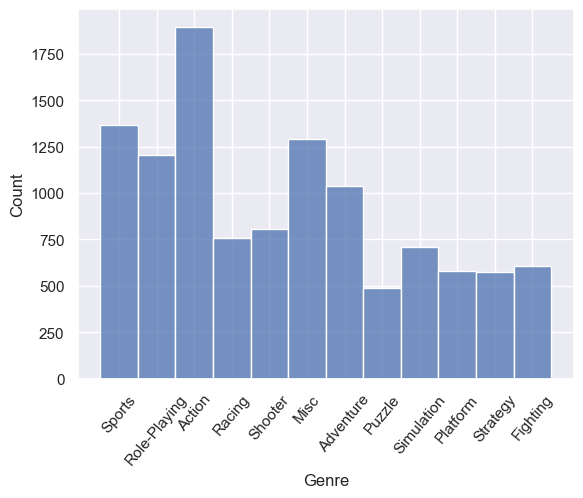

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df.Genre)
plt.xticks(rotation=50)
plt.show()

From the above graph, it is worth noting that some genres (such as Puzzle, Platform, and Fighting) have less than half the number of video games than other genres (such as Action and Sports). This disparity could make predicting the genre of Puzzle games, Platfrom games, etc. more difficult, as there isn't as much data to base the prediction off of.

Our final dataset includes the following data:

- <code>Year</code>: stored as a float and scaled

- <code>Genre</code>: stored as a string

- <code>NA_Sales</code>, <code>EU_Sales</code>, <code>JP_Sales</code>, <code>Other_Sales</code>, and <code>Global_Sales</code>: all stored as a float and scaled

- <code>Publisher</code>: stored as a one-hot encoding

Finally, we will divide our data into training and testing splits using Scikit-Learn.

In [10]:
from sklearn.model_selection import train_test_split

X = df_onehot.drop(columns=["Genre"])
y = df_onehot["Genre"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

We divided our data into an 80% training and 20% testing split. We believe this split is appropriate for our dataset, as after preprocessing, we have 11,325 rows of data to work with. We want most of our data to be used for training (so that there is plenty of data for each video game genre), but we also need to leave enough data for testing. If we use less than 20% of the data for testing, then our results would likely be skewed depending on what data ended up in the testing data. Thus, we believe the 80/20 split is good for our dataset, as it allows us to use the majority of the data for training, while still leaving enough data for testing so that our testing results are reliable.

## 3. Modeling

Now we will create our custom, one-versus-all logistic regression classifier. Our logistic regression classifier's functionality includes:
- Ability to choose from 3 different optimization techniques: Steepest Ascent, Stochastic Gradient Ascent, and the Broyden-Fletcher-Goldfarb-Shanno (BFGS) Quasi-Newton Method.
- Ability to customize the regularization term (either with no regularization, L1 regularization, L2 regularization, or both L1 and L2 regularization).
- Ability to define a cost <code><i>C</i></code> that is associated with the regularization term.

In [60]:
import numpy as np
from scipy.special import expit

# Binary Logistic Regression using vectorized implementation

class BinaryLogisticRegression:
    # Adjust default values for iterations and C as needed
    def __init__(self, eta, iterations=20, C=0.001, penalty='l2'):
        self.eta = eta          # The learning rate
        self.iterations = iterations
        self.C = C
        self.penalty = penalty

    def __str__(self):
        if(hasattr(self, 'weights_')):
            return "Binary Logistic Regression Object with coefficients:\n" + str(self.weights_)
        return 'Binary Logistic Regression Object is untrained'
    
    @staticmethod
    def _add_bias(X):
        # Add a column of float ones to X
        return np.hstack((np.ones((X.shape[0],1)), X))
    
    @staticmethod
    def _sigmoid(theta):
        return expit(theta)
    
    def _get_gradient(self, X, y):
        y_diff = y - self.predict_proba(X, add_bias=False).ravel()
        gradient = np.mean(X * y_diff[:,np.newaxis], axis = 0)
        gradient = gradient.reshape(self.weights_.shape)
        # Based on penalty type, add the appropriate term to the gradient
                
        if self.penalty == 'l1':
            gradient[1:] += self.C * sum(abs(self.weights_[1:]))
        elif self.penalty == 'l2':
            gradient[1:] += self.C * sum(self.weights_[1:]**2)
        elif self.penalty == 'both':
            gradient[1:] += self.C * sum(self.weights_[1:]**2) + self.C * sum(abs(self.weights_[1:]))
        elif self.penalty == 'none':
            pass
        return gradient
    
    def predict_proba(self, X, add_bias=True):
        X_bias = self._add_bias(X) if add_bias else X
        return self._sigmoid(X_bias @ self.weights_)
    
    def predict(self, X):
        return (self.predict_proba(X) > 0.5)
    
    def fit(self, X, y):
        X_bias = self._add_bias(X)
        num_samples, num_features = X_bias.shape
        self.weights_ = np.zeros((num_features,1))    # Creating the weight vector

        for _ in range(self.iterations):
            gradient = self._get_gradient(X_bias, y)
            self.weights_ += gradient * self.eta
    

In [61]:
from numpy import ma
from scipy.optimize import minimize_scalar

## Optimizing 1: Steepest Ascent

class SteepestAscentLogisticRegression(BinaryLogisticRegression):
    def __init__(self, line_iterations=0.0, **kwds):
        self.line_iterations = line_iterations
        super().__init__(**kwds)
        
    @staticmethod
    def objective_function(eta, X, y, w, gradient, C):
        w_new = w - gradient*eta
        gradient_new = expit(X @ w_new)
        return -(-np.sum(ma.log(gradient_new[y==1]))-ma.sum(ma.log(1-gradient_new[y==0])) + C*sum(w_new**2))

    def fit(self, X, y):
        X_bias = self._add_bias(X)
        num_samples, num_features = X_bias.shape
        self.weights_ = np.zeros((num_features,1))

        for _ in range (self.iterations):
            gradient = self._get_gradient(X_bias, y)
            opts = {'maxiter': self.line_iterations}
            res = minimize_scalar(self.objective_function,
                                  bounds=(0,self.eta*10),
                                  args=(X_bias, y, self.weights_, gradient, self.C),
                                  method='bounded',
                                  options=opts)

        eta = res.x
        self.weights_ += gradient * eta

In [62]:
## Optimizing 2: Stoachastic Gradient Ascent

class StochasticLogisticRegression(BinaryLogisticRegression):    
    def _get_gradient(self, X, y):
        batch_size = 16
        idxs = np.random.choice(len(y), batch_size)

        y_diff = y[idxs] - self.predict_proba(X[idxs], add_bias=False).ravel()
        gradient= np.mean(X[idxs] * y_diff[:,np.newaxis], axis = 0)

        gradient = gradient.reshape(self.weights_.shape)
                
        if self.penalty == 'l1':
            gradient[1:] += self.C * sum(abs(self.weights_[1:]))
        elif self.penalty == 'l2':
            gradient[1:] += self.C * sum(self.weights_[1:]**2)
        elif self.penalty == 'both':
            gradient[1:] += self.C * sum(self.weights_[1:]**2) + self.C * sum(abs(self.weights_[1:]))
        elif self.penalty == 'none':
            pass

        return -gradient

In [63]:
from scipy.optimize import fmin_bfgs
## Optimizing 3: Quasi-Newton Method (BFGS)

class BFGSLogisticRegression(BinaryLogisticRegression):    
    @staticmethod
    def objective_function(w, X, y, C, penalty):
        gradient = expit(X @ w)
        return -ma.sum(ma.log(gradient[y==1]))-ma.sum(ma.log(1-gradient[y==0])) + C*sum(w**2)
    
    @staticmethod
    def objective_gradient(w, X, y, C, penalty):
        gradient = expit(X @ w)
        y_diff = y - gradient
        gradient = np.mean(X * y_diff[:,np.newaxis], axis = 0)
        gradient = gradient.reshape(w.shape)
                
        if penalty == 'l1':
            gradient[1:] += C * sum(abs(w[1:]))
        elif penalty == 'l2':
            gradient[1:] += C * sum(w[1:]**2)
        elif penalty == 'both':
            gradient[1:] += C * sum(w[1:]**2) + C * sum(abs(w[1:]))
        elif penalty == 'none':
            pass
        return -gradient
    
    def fit(self, X, y):
        X_bias = self._add_bias(X)
        num_samples, num_features = X_bias.shape
        self.weights_ = fmin_bfgs(self.objective_function,
                                  np.zeros((num_features,1)),
                                  fprime=self.objective_gradient,
                                  args=(X_bias, y, self.C, self.penalty),
                                  gtol=1e-03,
                                  maxiter=self.iterations,
                                  disp=False)
        self.weights_ = self.weights_.reshape((num_features,1))

In [64]:
# Regularized Logistic Regression using vectorized implementation
class MultiClassLogisticRegression:
    # Penalty can be either 'l1' or 'l2' or 'both' or 'none', default to 'l2'
    def __init__(self, **kwds):
        self.eta = kwds.get('eta', 0.01)  # The learning rate
        self.iterations = kwds.get('iterations', 20)
        self.line_iterations = kwds.get('line_iterations', 0.0)
        self.C = kwds.get('C', 0.001)
        self.penalty = kwds.get('penalty', 'l2')
        self.solver = kwds.get('solver', SteepestAscentLogisticRegression)
        self.classifiers_ = []

    def __str__(self):
        if(hasattr(self, 'weights_')):
            return "Multiclass Logistic Regression Object with coefficients:\n" + str(self.weights_)
        return 'Multiclass Logistic Regression Object is untrained'
    
    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.unique_classes_ = np.sort(np.unique(y))
        num_unique_classes = len(self.unique_classes_)
        self.classifiers_ = []

        for i, y_value in enumerate(self.unique_classes_):
            # One vs All
            y_binary = np.array(y==y_value).astype(int)
            # Only pass line_iterations to solver if it is not 0.0
            
            if self.line_iterations == 0.0:
                lr = self.solver(eta=self.eta, iterations=self.iterations, C=self.C, penalty=self.penalty)
            else:
                lr = self.solver(eta=self.eta, iterations=self.iterations, line_iterations=self.line_iterations, C=self.C, penalty=self.penalty)
            lr.fit(X, y_binary)
            self.classifiers_.append(lr)
        
        self.weights_ = np.hstack([x.weights_ for x in self.classifiers_]).T

    def predict_proba(self, X):
        probabilities = []
        for lr in self.classifiers_:
            probabilities.append(lr.predict_proba(X).reshape((len(X),1)))
        return np.hstack(probabilities)
    
    def predict(self, X):
        return self.unique_classes_[np.argmax(self.predict_proba(X), axis=1)]

Now that we have created our multiclass logistic regression classifier, we need to experiment with different hyperparameter values to determine which values produce the best results. We will do this by trying several different eta values, C values, regularization terms, and optimization techniques. We will then plot our results and store the parameters that result in the highest accuracy.

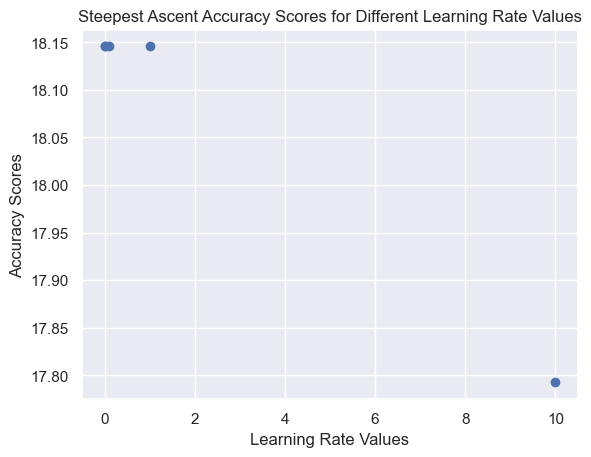

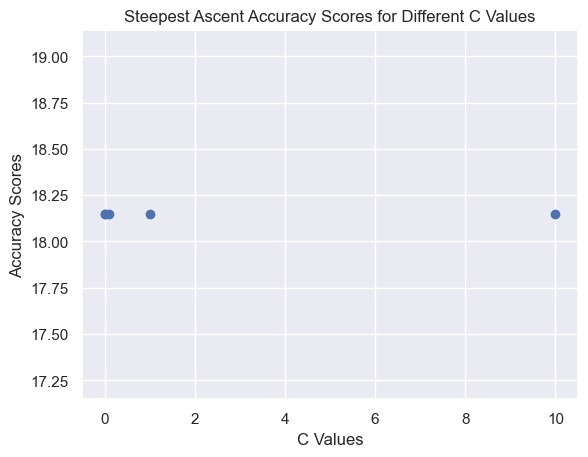

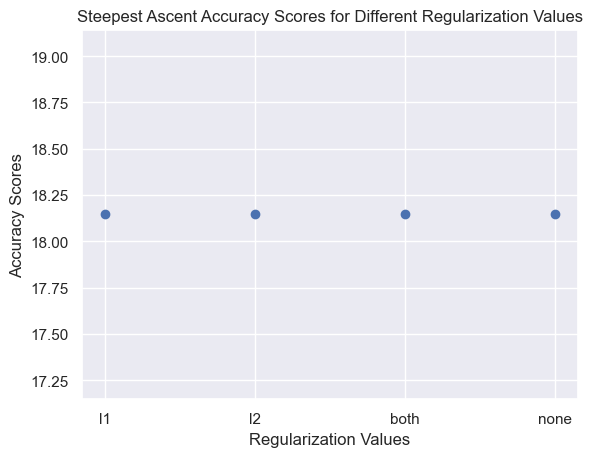

In [123]:
import warnings

warnings.simplefilter('ignore')

# SteepestAscentLogisticRegression with different eta values
accuracy_scores = []
eta_values = [0.001, 0.01, 0.1, 1, 10]
for eta in eta_values:
    mlr = MultiClassLogisticRegression(eta=eta,
                                       iterations=8,
                                       line_iterations=8,
                                       C=0.001,
                                       solver=SteepestAscentLogisticRegression,
                                       penalty='l2')
    mlr.fit(X_train, y_train)
    accuracy = accuracy_score(y_test, mlr.predict(X_test)) * 100
    accuracy_scores.append(accuracy)


plt.scatter(eta_values, accuracy_scores)
plt.xlabel('Learning Rate Values')
plt.ylabel('Accuracy Scores')
plt.title('Steepest Ascent Accuracy Scores for Different Learning Rate Values')
plt.show()

best_eta = eta_values[accuracy_scores.index(max(accuracy_scores))]

# SteepestAscentLogisticRegression with different C values
accuracy_scores = []
C_values = [0.001, 0.01, 0.1, 1, 10]
for C in C_values:
    mlr = MultiClassLogisticRegression(eta=best_eta,
                                       iterations=8,
                                       line_iterations=8,
                                       C=C,
                                       solver=SteepestAscentLogisticRegression,
                                       penalty='l2')
    mlr.fit(X_train, y_train)
    accuracy = accuracy_score(y_test, mlr.predict(X_test)) * 100
    accuracy_scores.append(accuracy)


plt.scatter(C_values, accuracy_scores)
plt.xlabel('C Values')
plt.ylabel('Accuracy Scores')
plt.title('Steepest Ascent Accuracy Scores for Different C Values')
plt.show()

# SteepestAscentLogisticRegression with different regularization combinations
best_C = C_values[accuracy_scores.index(max(accuracy_scores))]
regularization_values = ['l1', 'l2', 'both', 'none']
accuracy_scores = []

for regularization in regularization_values:
    mlr = MultiClassLogisticRegression(eta=best_eta,
                                       iterations=8,
                                       line_iterations=8,
                                       C=best_C,
                                       solver=SteepestAscentLogisticRegression,
                                       penalty=regularization)
    mlr.fit(X_train, y_train)
    accuracy = accuracy_score(y_test, mlr.predict(X_test)) * 100
    accuracy_scores.append(accuracy)

best_regularization = regularization_values[accuracy_scores.index(max(accuracy_scores))]

plt.scatter(regularization_values, accuracy_scores)
plt.xlabel('Regularization Values')
plt.ylabel('Accuracy Scores')
plt.title('Steepest Ascent Accuracy Scores for Different Regularization Values')
plt.show()

best_model_parameters = {
    'eta': best_eta,
    'C': best_C,
    'regularization': best_regularization,
    'solver': SteepestAscentLogisticRegression
}
best_model_accuracy = max(accuracy_scores)

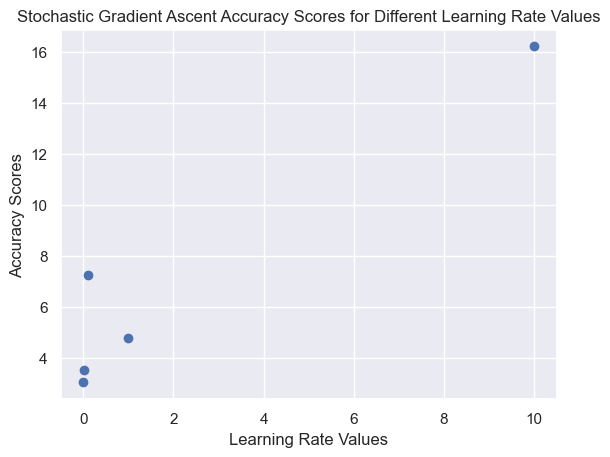

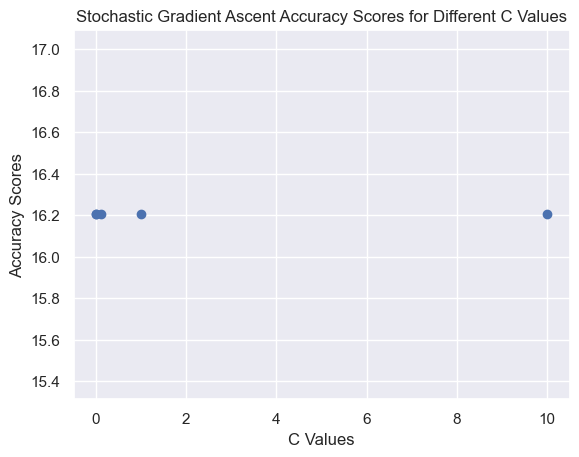

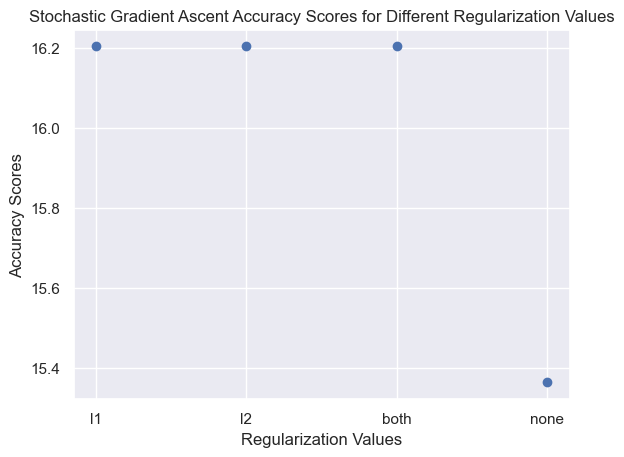

In [124]:
# StochasticLogisticRegression with different eta values
accuracy_scores = []
eta_values = [0.001, 0.01, 0.1, 1, 10]
for eta in eta_values:
    mlr = MultiClassLogisticRegression(eta=eta,
                                       iterations=8,
                                       C=0.001,
                                       solver=StochasticLogisticRegression,
                                       penalty='l2')
    mlr.fit(X_train, y_train)
    accuracy = accuracy_score(y_test, mlr.predict(X_test)) * 100
    accuracy_scores.append(accuracy)


plt.scatter(eta_values, accuracy_scores)
plt.xlabel('Learning Rate Values')
plt.ylabel('Accuracy Scores')
plt.title('Stochastic Gradient Ascent Accuracy Scores for Different Learning Rate Values')
plt.show()

best_eta = eta_values[accuracy_scores.index(max(accuracy_scores))]

# StochasticLogisticRegression with different C values
accuracy_scores = []
C_values = [0.001, 0.01, 0.1, 1, 10]
for C in C_values:
    mlr = MultiClassLogisticRegression(eta=best_eta,
                                       iterations=8,
                                       C=C,
                                       solver=StochasticLogisticRegression,
                                       penalty='l2')
    mlr.fit(X_train, y_train)
    accuracy = accuracy_score(y_test, mlr.predict(X_test)) * 100
    accuracy_scores.append(accuracy)

plt.scatter(C_values, accuracy_scores)
plt.xlabel('C Values')
plt.ylabel('Accuracy Scores')
plt.title('Stochastic Gradient Ascent Accuracy Scores for Different C Values')
plt.show()

# StochasticLogisticRegression with different regularization combinations
best_C = C_values[accuracy_scores.index(max(accuracy_scores))]
regularization_values = ['l1', 'l2', 'both', 'none']
accuracy_scores = []

for regularization in regularization_values:
    mlr = MultiClassLogisticRegression(eta=best_eta,
                                       iterations=8,
                                       C=best_C,
                                       solver=StochasticLogisticRegression,
                                       penalty=regularization)
    mlr.fit(X_train, y_train)
    accuracy = accuracy_score(y_test, mlr.predict(X_test)) * 100
    accuracy_scores.append(accuracy)

best_regularization = regularization_values[accuracy_scores.index(max(accuracy_scores))]
    
plt.scatter(regularization_values, accuracy_scores)
plt.xlabel('Regularization Values')
plt.ylabel('Accuracy Scores')
plt.title('Stochastic Gradient Ascent Accuracy Scores for Different Regularization Values')
plt.show()

if max(accuracy_scores) > best_model_accuracy:
    best_model_parameters = {
        'eta': best_eta,
        'C': best_C,
        'regularization': best_regularization,
        'solver': StochasticLogisticRegression
    }
    best_model_accuracy = max(accuracy_scores)

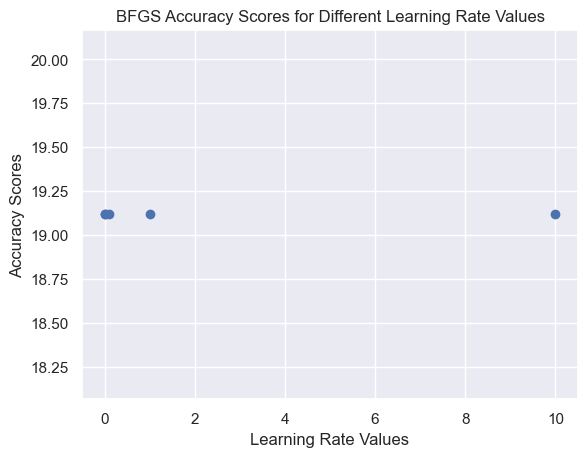

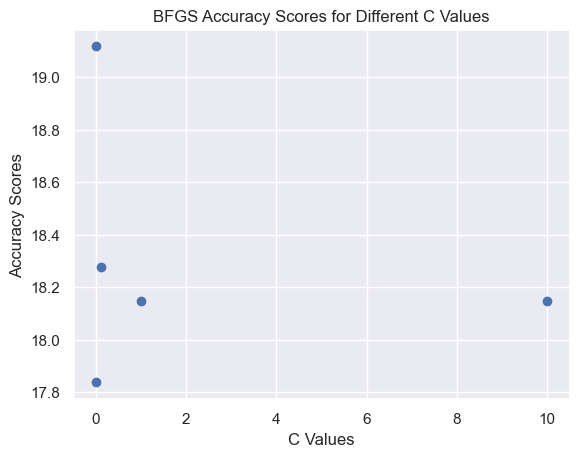

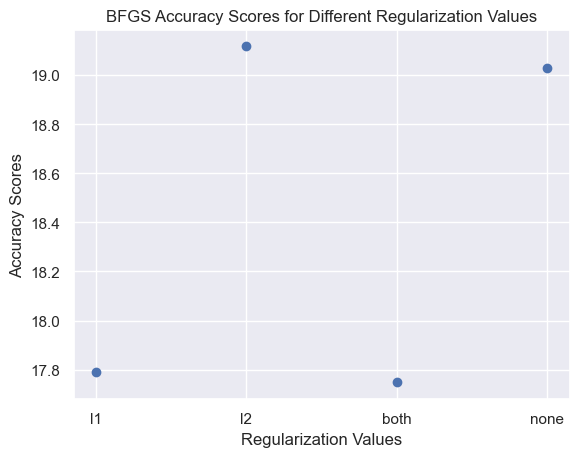

In [125]:
# BFGSLogisticRegression with different eta values
accuracy_scores = []
eta_values = [0.001, 0.01, 0.1, 1, 10]
for eta in eta_values:
    mlr = MultiClassLogisticRegression(eta=eta,
                                       iterations=8,
                                       C=0.001,
                                       solver=BFGSLogisticRegression,
                                       penalty='l2')
    mlr.fit(X_train, y_train)
    accuracy = accuracy_score(y_test, mlr.predict(X_test)) * 100
    accuracy_scores.append(accuracy)


plt.scatter(eta_values, accuracy_scores)
plt.xlabel('Learning Rate Values')
plt.ylabel('Accuracy Scores')
plt.title('BFGS Accuracy Scores for Different Learning Rate Values')
plt.show()

best_eta = eta_values[accuracy_scores.index(max(accuracy_scores))]

# BFGSLogisticRegression with different C values
accuracy_scores = []
C_values = [0.001, 0.01, 0.1, 1, 10]
for C in C_values:
    mlr = MultiClassLogisticRegression(eta=best_eta,
                                       iterations=8,
                                       C=C,
                                       solver=BFGSLogisticRegression,
                                       penalty='l2')
    mlr.fit(X_train, y_train)
    accuracy = accuracy_score(y_test, mlr.predict(X_test)) * 100
    accuracy_scores.append(accuracy)

plt.scatter(C_values, accuracy_scores)
plt.xlabel('C Values')
plt.ylabel('Accuracy Scores')
plt.title('BFGS Accuracy Scores for Different C Values')
plt.show()

# BFGSLogisticRegression with different regularization combinations
best_C = C_values[accuracy_scores.index(max(accuracy_scores))]
regularization_values = ['l1', 'l2', 'both', 'none']
accuracy_scores = []

for regularization in regularization_values:
    mlr = MultiClassLogisticRegression(eta=best_eta,
                                       iterations=8,
                                       C=best_C,
                                       solver=BFGSLogisticRegression,
                                       penalty=regularization)
    mlr.fit(X_train, y_train)
    accuracy = accuracy_score(y_test, mlr.predict(X_test)) * 100
    accuracy_scores.append(accuracy)

best_regularization = regularization_values[accuracy_scores.index(max(accuracy_scores))]
    
plt.scatter(regularization_values, accuracy_scores)
plt.xlabel('Regularization Values')
plt.ylabel('Accuracy Scores')
plt.title('BFGS Accuracy Scores for Different Regularization Values')
plt.show()

if max(accuracy_scores) > best_model_accuracy:
    best_model_parameters = {
        'eta': best_eta,
        'C': best_C,
        'regularization': best_regularization,
        'solver': BFGSLogisticRegression
    }
    best_model_accuracy = max(accuracy_scores)

In [126]:
print('The best model was:')
print('eta:', best_model_parameters['eta'])
print('C:', best_model_parameters['C'])
print('solver:', str(best_model_parameters['solver']).split('.')[-1][:-2]) 
print('regularization:', best_model_parameters['regularization'], '\n')

The best model was:
eta: 0.001
C: 0.001
solver: BFGSLogisticRegression
regularization: l2 



As seen above, the highest accuracy we got was 19.12%, which we got with our BFGS Logistic Regression method with parameters <code>eta</code>=0.001, <code>C</code>=0.001, <code>solver</code>=BFGSLogisticRegression, and <code>regularization</code>=l2. We believe that our method of selecting parameters is justified; however, we did do some data snooping. We found that the ideal number of iterations was 8 (as this gave us the highest accuracy that we could find). Additionally, as the graphs above show, sometimes the accuracy would vary wildly when given different <code>eta</code>, <code>C</code>, and <code>regularization</code> parameters. Couple this with our generally low accuracy across the board, and we're not very confident that our model would perform well on data that our model has not seen before.

Now we will compare our model to Scikit-Learn's BFGS model and see how it compares.

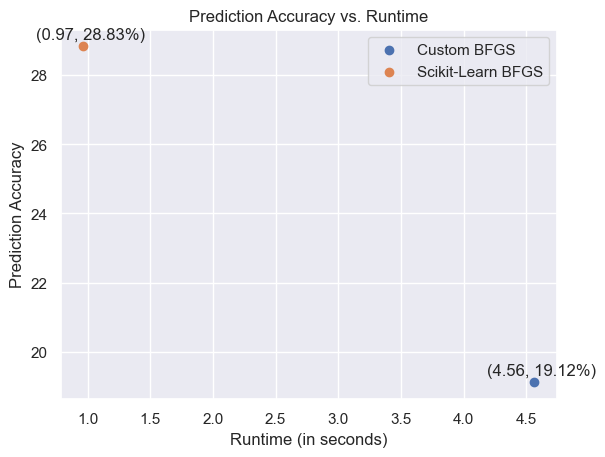

In [127]:
from time import time

mlr = MultiClassLogisticRegression(eta=best_model_parameters['eta'],
                                   iterations=8,
                                   C=best_model_parameters['C'],
                                   solver=best_model_parameters['solver'],
                                   penalty=best_model_parameters['regularization'])

start = time()
mlr.fit(X_train, y_train)
predictions = mlr.predict(X_test)
end = time()
custom_time = end - start

custom_accuracy = accuracy_score(y_test, predictions) * 100


lr_sk = LogisticRegression(solver='lbfgs') 

start = time()
lr_sk.fit(X_train, y_train) 
predictions = lr_sk.predict(X_test)
end = time()
sk_learn_time = end - start

sk_learn_accuracy = accuracy_score(y_test, predictions) * 100

plt.scatter(custom_time, custom_accuracy, label='Custom BFGS')
plt.annotate(f"({custom_time:.2f}, {custom_accuracy:.2f}%)", (custom_time, custom_accuracy), textcoords="offset points", xytext=(5, 5), ha='center')
plt.scatter(sk_learn_time, sk_learn_accuracy, label='Scikit-Learn BFGS')
plt.annotate(f"({sk_learn_time:.2f}, {sk_learn_accuracy:.2f}%)", (sk_learn_time, sk_learn_accuracy), textcoords="offset points", xytext=(5, 5), ha='center')

plt.title('Prediction Accuracy vs. Runtime')
plt.xlabel('Runtime (in seconds)')
plt.ylabel('Prediction Accuracy')
plt.legend()
plt.show()

As shown above, Scikit-Learn's implementation is far better than ours, both in terms of runtime (0.97 seconds vs. 4.56 seconds) and accuracy (28.83% vs. 19.12%). Thus, it is clear that Scikit-Learn's optimization techniques are superior to our own, as it is 4 times faster and 50% more accurate than our own implementation.

## 4. Deployment

In general, if a deployed machine learning model was needed, we would advise that Scikit-Learn's implementation be used over our own. It's optimization techniques make it both faster and more accurate than our implementation. Additionally, we only achieved a semi-respectable accuracy using our method after trying several different parameter values, while Scikit-Learn achieved a much higher accuracy just using its default parameters. Thus, Scikit-Learn's implementation would be better for a deployed machine learning model.

However, for our specific prediction problem (trying to predict the genre of a video game), we would recommend that neither of these methods be used. The highest accuracy across both of our methods was 28.83%, which is nowhere near the ideal threshold of 90% that we outlined earlier in this report. Whether this is due to the nature of the classification problem, or due to insufficient information derived from the rest of the data, a more refined method (such as neural networks) would be needed to obtain a model that provides a reasonable accuracy for classifying video games' genres.

## 5. BFGS Algorithm From Scratch

Now, we will attempt to implement the BFGS Algorithm from scratch (without the use of external packages) and compare it to Scikit-Learn's BFGS Algorithm.

In [128]:
### BFGS from scratch
class BFGSBinaryLogisticRegressionScratch(BinaryLogisticRegression):
    @staticmethod
    def objective_gradient(w,X,y,C,penalty):
        gradient = expit(X @ w)
        ydiff = y-gradient # get y difference
        gradient = np.mean(X * ydiff[:,np.newaxis], axis=0)
        gradient = gradient.reshape(w.shape)
        if penalty == 'l1':
            gradient[1:] += C * sum(abs(w[1:]))
        elif penalty == 'l2':
            gradient[1:] += C * sum(w[1:]**2)
        elif penalty == 'both':
            gradient[1:] += C * sum(w[1:]**2) + C * sum(abs(w[1:]))
        elif penalty == 'none':
            pass
        return -gradient
    
    def fit(self, X, y):
        X_bias = self._add_bias(X) # add bias term
        num_samples, num_features = X_bias.shape
        # Initialization (Step 1)
        self.weights_ = np.zeros((num_features))
        # Set initial Hessian to identity matrix
        hessian = np.identity(num_features)
        inv_hessian = np.linalg.inv(hessian)
        # Iterate through the number of iterations
        for _ in range(self.iterations):
            # Set p_k equal to the negative inverse hessian times the gradient (Step 2)
            gradient_old = self.objective_gradient(self.weights_, X_bias, y, self.C, self.penalty)
            p_k = -inv_hessian @ gradient_old
            # Update weights (Step 3)
            self.weights_ += self.eta * p_k
            # Save the scaled direction (Step 4)
            s_k = (self.eta * p_k).reshape((-1, 1))
            # Approximate the change in the derivative (Step 5a)
            v_k = (self.objective_gradient(self.weights_, X_bias, y, self.C, self.penalty) - gradient_old).reshape((-1, 1))
            # Define u_k (Step 5b)
            u_k = v_k - hessian @ s_k
            # Redfine the approximate hessian update (Step 6)
            hessian += (v_k @ v_k.T)/(v_k.T @ s_k) - (hessian @ s_k @ s_k.T @ hessian)/(s_k.T @ hessian @ s_k)
            # Approximate the inverse hessian (Step 7)
            inv_hessian += (s_k.T @ v_k + inv_hessian) * (s_k @ s_k.T)/(s_k.T @ v_k)**2 - (inv_hessian @ v_k @ s_k.T + s_k @ v_k.T @ inv_hessian)/(s_k.T @ v_k)

        self.weights_ = self.weights_.reshape((num_features,1))
        

In [129]:
bfgs_lr = MultiClassLogisticRegression(eta=0.001,
                                       iterations=8,
                                       C=0.001,
                                       solver=BFGSBinaryLogisticRegressionScratch,
                                       penalty='l2')

start = time()
bfgs_lr.fit(X_train, y_train)
predictions = bfgs_lr.predict(X_test)
end = time()
scratch_time = end - start

scratch_accuracy = accuracy_score(y_test, predictions) * 100
print(bfgs_lr)
print(f'Accuracy: {scratch_accuracy:.2f}%')

Multiclass Logistic Regression Object with coefficients:
[[ 9.42529341e+123 -7.80187606e+122 -4.39206090e+121 ... -2.35492696e+117
  -2.35525836e+117 -5.22958063e+116]
 [-8.56790687e+091 -1.76098286e+090 -9.64293273e+089 ... -8.19152665e+084
  -8.19149714e+084 -3.42963696e+084]
 [-4.14729868e+059 -1.03673380e+057 -4.66365330e+055 ... -2.15526792e+052
  -2.15526770e+052 -1.03960099e+052]
 ...
 [-7.58382254e+063 -1.65718249e+060 -4.48009945e+060 ... -3.34608942e+056
  -3.34608610e+056 -1.52869781e+056]
 [-1.97924069e+092 -2.75710898e+090 -3.63017410e+089 ... -1.36794165e+085
  -1.36794066e+085 -4.49970392e+084]
 [-3.87155810e+058 -1.14666898e+055 -6.11857077e+055 ... -2.14542525e+051
  -2.14542160e+051 -1.06451715e+051]]
Accuracy: 10.38%


Now that we've run our BFGS algorithm from scratch on our data, we can plot it and compare it with the BFGS implementations we looked at earlier.

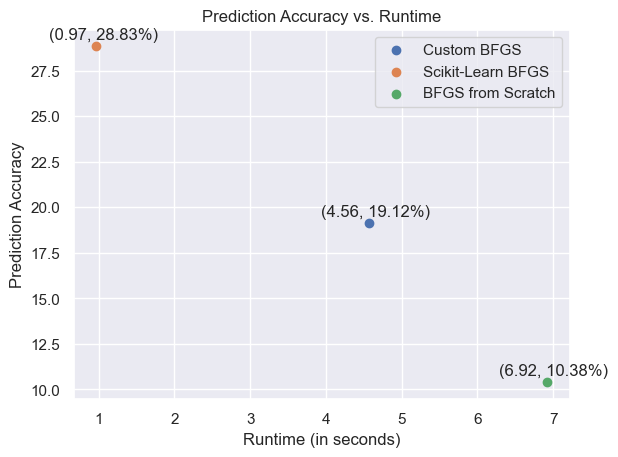

In [130]:
# Same plot from above, but now with BFGS from scratch data
plt.scatter(custom_time, custom_accuracy, label='Custom BFGS')
plt.annotate(f"({custom_time:.2f}, {custom_accuracy:.2f}%)", (custom_time, custom_accuracy), textcoords="offset points", xytext=(5, 5), ha='center')
plt.scatter(sk_learn_time, sk_learn_accuracy, label='Scikit-Learn BFGS')
plt.annotate(f"({sk_learn_time:.2f}, {sk_learn_accuracy:.2f}%)", (sk_learn_time, sk_learn_accuracy), textcoords="offset points", xytext=(5, 5), ha='center')
plt.scatter(scratch_time, scratch_accuracy, label='BFGS from Scratch')
plt.annotate(f"({scratch_time:.2f}, {scratch_accuracy:.2f}%)", (scratch_time, scratch_accuracy), textcoords="offset points", xytext=(5, 5), ha='center')


plt.title('Prediction Accuracy vs. Runtime')
plt.xlabel('Runtime (in seconds)')
plt.ylabel('Prediction Accuracy')
plt.legend()
plt.show()

As the above plot shows, our BFGS algorithm from scratch is clearly worse than the other implementations of BFGS that we looked at before. It takes longer to run (6.92 seconds) and has a lower accuracy (10.38%) than both Scikit-Learn's implementation and our custom implementation that utilized Scikit-Learn for the BFGS algorithm. Thus, it is clear that this model would also not be useful if it was utilized in a deployed machine learning model.

Whether this dataset has insufficient information to effectively predict a video game's genre, or simply that Logistic Regression is not an effective method to perform classification with this dataset, none of the methods we have explored are useful in a business context, and we would advise that another method be used to predict a video game's genre.